# 逻辑回归-银行贷款违约问题

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('datas/bankloan.xls')

In [3]:
X = data.iloc[:,:8].as_matrix()
y = data.iloc[:,8].as_matrix()

In [4]:
data.head()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [5]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR 

## 随机逻辑回归

筛选有效 特征

In [6]:
rlr = RLR() #建立随机逻辑回归模型，筛选变量
rlr.fit(X, y) #训练模型
print(rlr.get_support()) #获取特征筛选结果，也可以通过.scores_方法获取各个特征的分数
print('通过随机逻辑回归模型筛选特征结束------------')
suport_columns = np.append(rlr.get_support(), False)
print(','.join(data.columns[suport_columns]))

[False False  True  True False  True  True False]
通过随机逻辑回归模型筛选特征结束------------
工龄,地址,负债率,信用卡负债


/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


## 逻辑回归
![](images/logistic.png)

In [7]:
#筛选好特征
X = data[data.columns[suport_columns]].as_matrix()
lr = LR() #建立逻辑回归模型
lr.fit(X, y) #用筛选后的特征数据来训练模型
print('逻辑回归模型训练结束------------')
print(u'模型的平均正确率为：%s' % lr.score(X, y)) #给出模型的平均正确率，本例为81.4%

逻辑回归模型训练结束------------
模型的平均正确率为：0.8142857142857143


/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
X.shape

(700, 4)

# 非线性回归

销售额X 与 流通费率y

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression

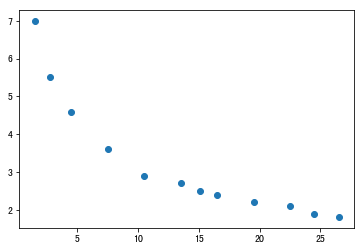

In [10]:
X = pd.DataFrame([1.5,2.8,4.5,7.5,10.5,13.5,15.1,16.5,19.5,22.5,24.5,26.5])
y = pd.DataFrame([7.0,5.5,4.6,3.6,2.9,2.7,2.5,2.4,2.2,2.1,1.9,1.8])
plt.scatter(X, y)

In [11]:
linreg = LinearRegression()
linreg.fit(X, y)

/Users/mgbook/.pyenv/versions/3.6.4rc1/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.直线回归
![](images/01.png)

Coefficients: 
 [[-0.17002988]]
MSE: 0.494218627800241
Variance score: 0.80


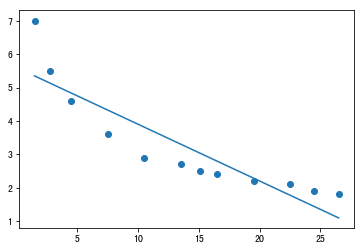

In [12]:
# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(X)
# The mean square error
print("MSE:", metrics.mean_squared_error(y, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linreg.score(X, y))
plt.scatter(X, y)
plt.plot(X, y_pred)

## 2.多项式模型
![](images/02.png)

In [13]:
x1 = X
x2 = X**2
x1['x2'] = x2

linreg = LinearRegression()
linreg.fit(x1, y)
# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(X)
# The mean square error
print("MSE:",metrics.mean_squared_error(y, y_pred))
print('Variance score: %.2f' % linreg.score(x1, y))

Coefficients: 
 [[-0.4656313   0.01075704]]
MSE: 0.11811957095094376
Variance score: 0.95


In [14]:
x1

,0,x2
0,1.5,2.25
1,2.8,7.84
2,4.5,20.25
3,7.5,56.25
4,10.5,110.25
5,13.5,182.25
6,15.1,228.01
7,16.5,272.25
8,19.5,380.25
9,22.5,506.25


## 3.对数模型
![](images/03.png)

In [15]:
x2 = pd.DataFrame(np.log(X[0]))

linreg = LinearRegression()
linreg.fit(x2, y)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(x2)
# The mean square error
print("MSE:", metrics.mean_squared_error(y, y_pred))
print('Variance score: %.2f' % linreg.score(x2, y))

Coefficients: 
 [[-1.75683848]]
MSE: 0.035512357185799176
Variance score: 0.99


## 4.指数
![](images/04.png)

In [16]:
y2 = pd.DataFrame(np.log(y))

linreg = LinearRegression()
linreg.fit(pd.DataFrame(X[0]), y2)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(pd.DataFrame(X[0]))
# The mean square error
print("MSE:", metrics.mean_squared_error(y2, y_pred))
print('Variance score: %.2f' % linreg.score(pd.DataFrame(X[0]), y2))

Coefficients: 
 [[-0.04880874]]
MSE: 0.01474841988614977
Variance score: 0.92


## 5.幂函数
![](images/05.png)

In [17]:
linreg = LinearRegression()
linreg.fit(x2, y2)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(x2)
# The mean square error
print("MSE:",metrics.mean_squared_error(y2, y_pred))
print('Variance score: %.2f' % linreg.score(x2, y2))

Coefficients: 
 [[-0.47242789]]
MSE: 0.0010862101591600077
Variance score: 0.99
